In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#importing data
data = pd.read_csv('churn_prediction.csv')

# DATA EXPLORATION AND PREPROCESSING 

In [3]:
data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,Male,0.0,self_employed,623.0,2,317,10096.58,...,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,Male,0.0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,Male,3.0,self_employed,1020.0,2,38,4957.95,...,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


In [4]:
data.tail(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28372,30292,2183,49,Male,1.0,self_employed,1320.0,3,1347,197.83,...,2145.22,5827.11,286.33,10686.33,10609.46,609.46,2046.76,3843.40,1,2019-12-06
28373,30293,2272,73,Male,0.0,retired,1381.0,3,790,2554.37,...,1491.87,1973.16,2514.47,433.49,1039.76,180.37,1410.80,1800.70,0,2019-12-28
28374,30294,2417,55,Male,0.0,salaried,1076.0,3,463,7713.88,...,7713.88,7670.06,0.33,0.33,0.33,0.33,7713.88,7713.88,1,2019-02-28
28375,30295,2398,42,Male,0.0,self_employed,146.0,2,286,7493.69,...,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0,2019-11-04
28376,30296,2300,85,Male,0.0,retired,1589.0,2,389,1741.50,...,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0,NaT
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [5]:
data.shape

(28382, 21)

In [6]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [7]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

### Integer Data Type

In [8]:
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Inference
*    **Customer id** - unique number assigned to customers. It is **Integer**.

*    **branch code** - represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers . They are correct as **Integers**.

*    **customer_networth_category** is ordinal category, should be **converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This needs to be **converted to category datatype**.



In [9]:
# converting churn , branch_code , customer_nw_category to category
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

### Float Data Type 

In [10]:
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Inference:

*    **dependents** is expected to be a whole number. Should be changed to **integer type**

*    **city** variable is also a unique code of a city represented by some integer number. Should be converted to **Category type**

*    Rest of the variables like **credit, balance and debit** are best represented by the **float** variables.

In [11]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

### Object Data Type

In [12]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [13]:
data[['gender','occupation','last_transaction']].head(10)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24
7,Male,self_employed,2019-07-12
8,Male,salaried,2019-12-12
9,Male,self_employed,2019-12-31


*    **gender** and **occupation** variables are **categorical data types**.
*    **last_transaction** should be a  **datetime variable**.

In [14]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

### Date Time Data Type

In [15]:
date = pd.DatetimeIndex(data['last_transaction'])

In [16]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [17]:
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

Breaking down the date variable into these granular information will help us in understand when the last transaction was done from different perspectives. 

In [18]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

### UNIVARIATE ANALYSIS : NUMERICAL VARIABLES 

In [19]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [20]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [21]:
def UVA_numeric(data, var_group):

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

#### CUSTOMER INFORMATION

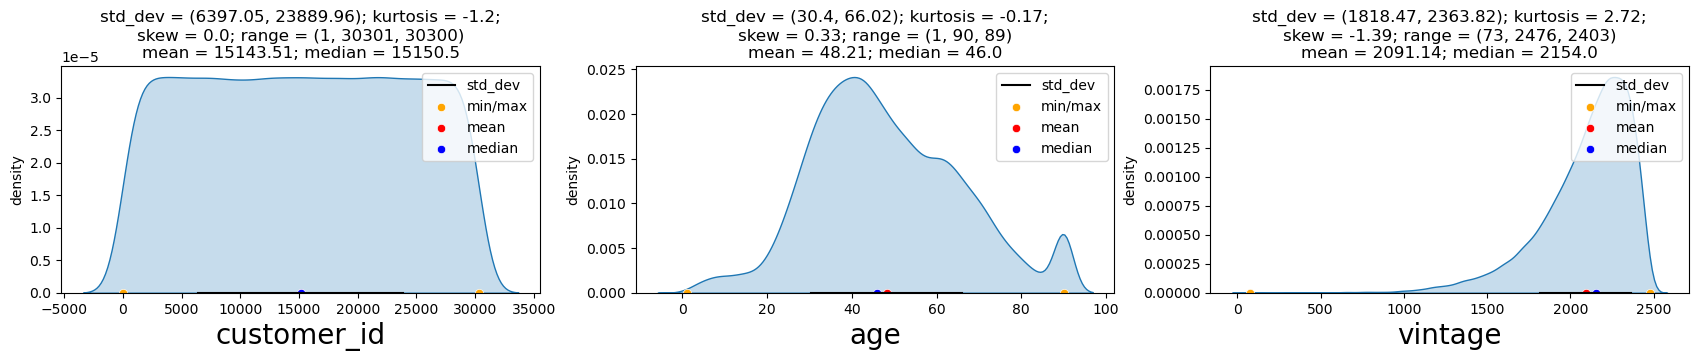

In [22]:
UVA_numeric(data,customer_details)

**Inferences from Customer_Information:**
*    **customer_id**:
     *    variable is **unique for every customer.** Hence **uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
    
*    **vintage:**
    *    Most customers joined between 2100 and 2650 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

#### CURRENT MONTH 

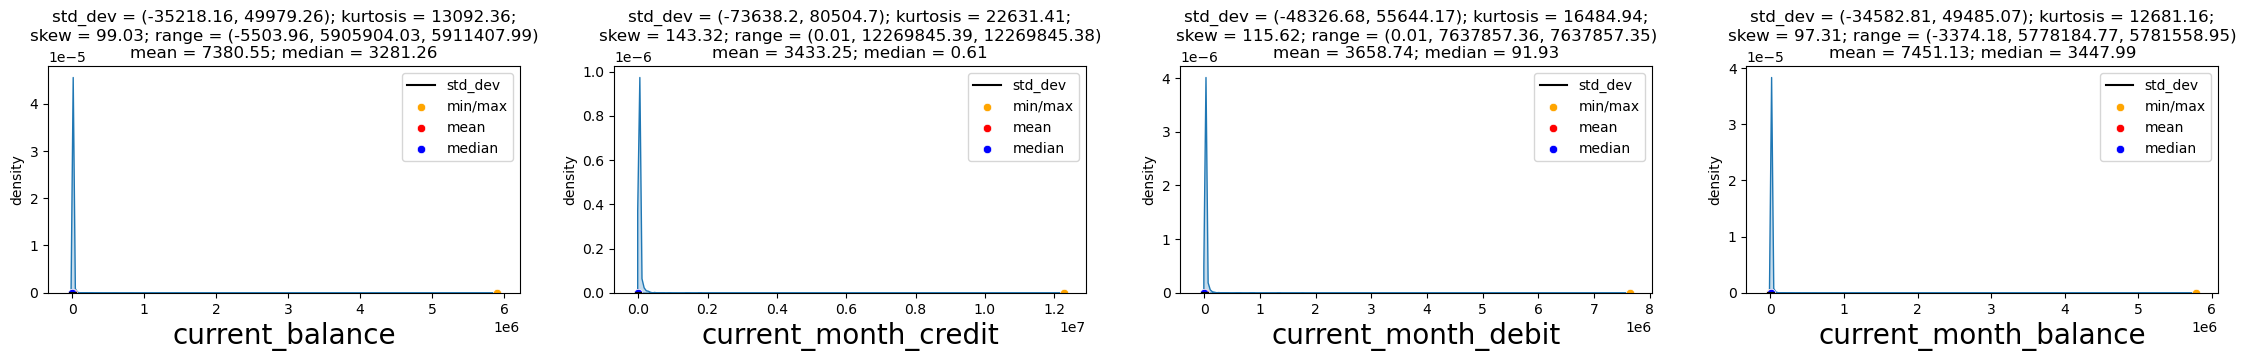

In [23]:
UVA_numeric(data,current_month)

From the large value of skewness and kurtosis , it is evident that the data has several outliers. Hence the outliers need to be removed.

In [24]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

(28382, 27113)

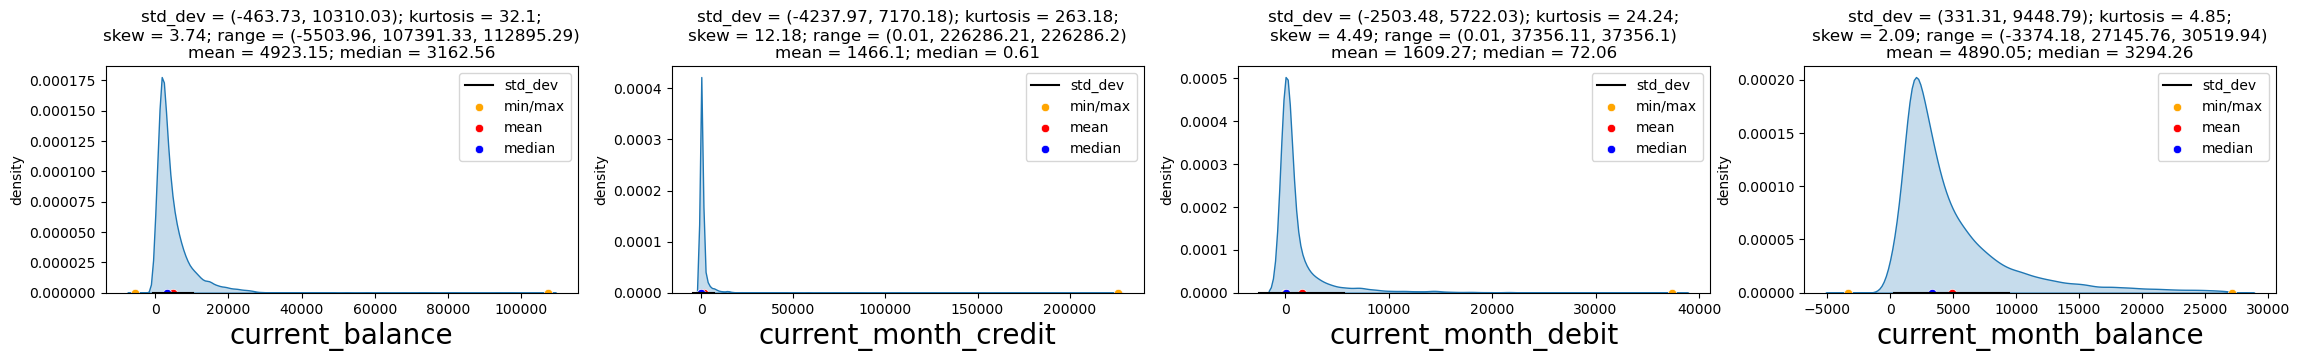

In [25]:
UVA_numeric(cm_data,current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

#### PREVIOUS MONTH

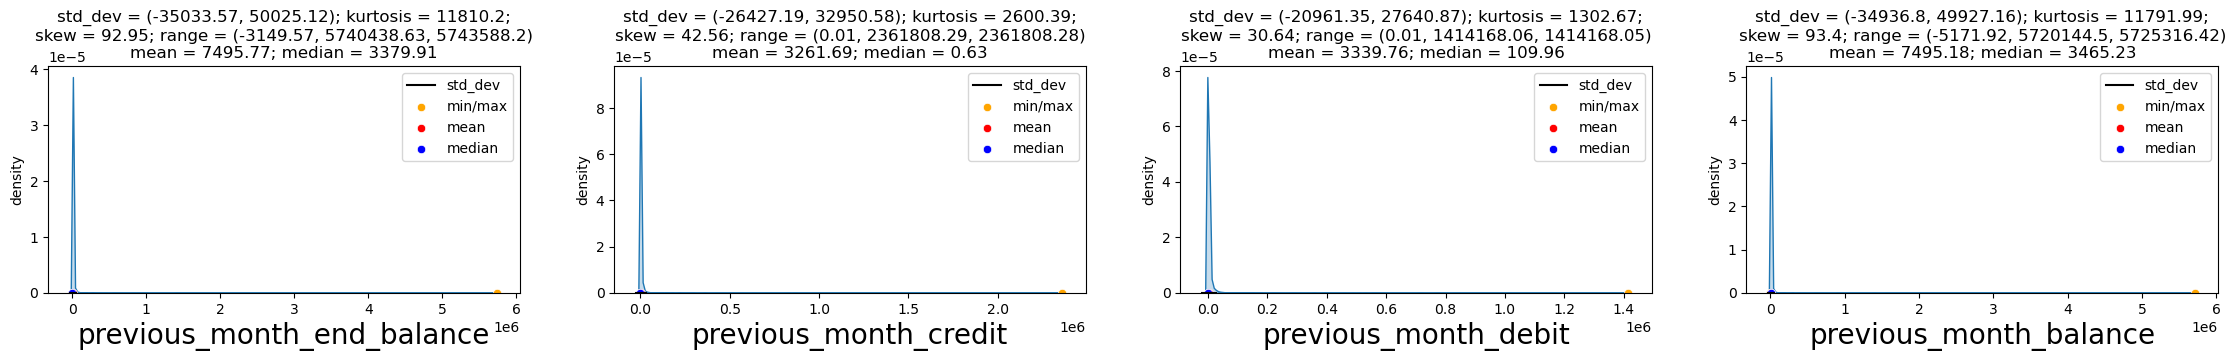

In [26]:
UVA_numeric(data,previous_month)

Just like current month , most customers prefer low amount of transactions.

#### PREVIOUS QUARTERS

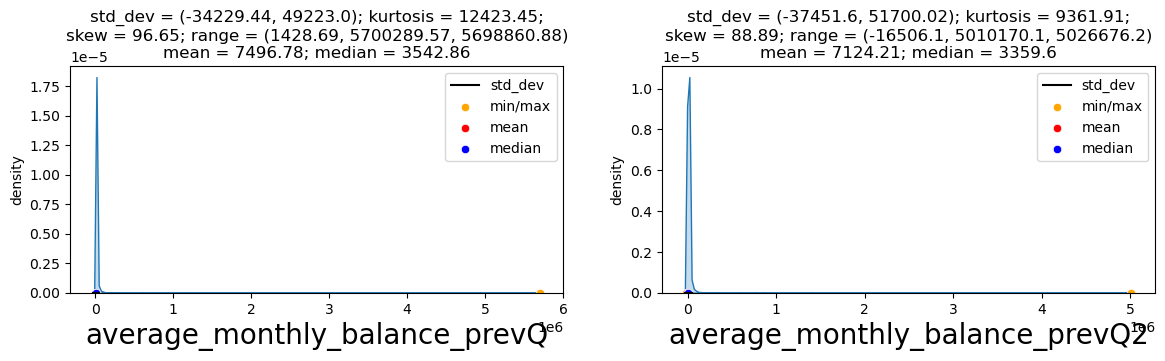

In [27]:
UVA_numeric(data,previous_quarters)

**Summary**:

The general trend still follows. Most customers make small transactions. There must be a common trait between the customers doing high amount of transactions.

#### DATE OF TRANSACTION

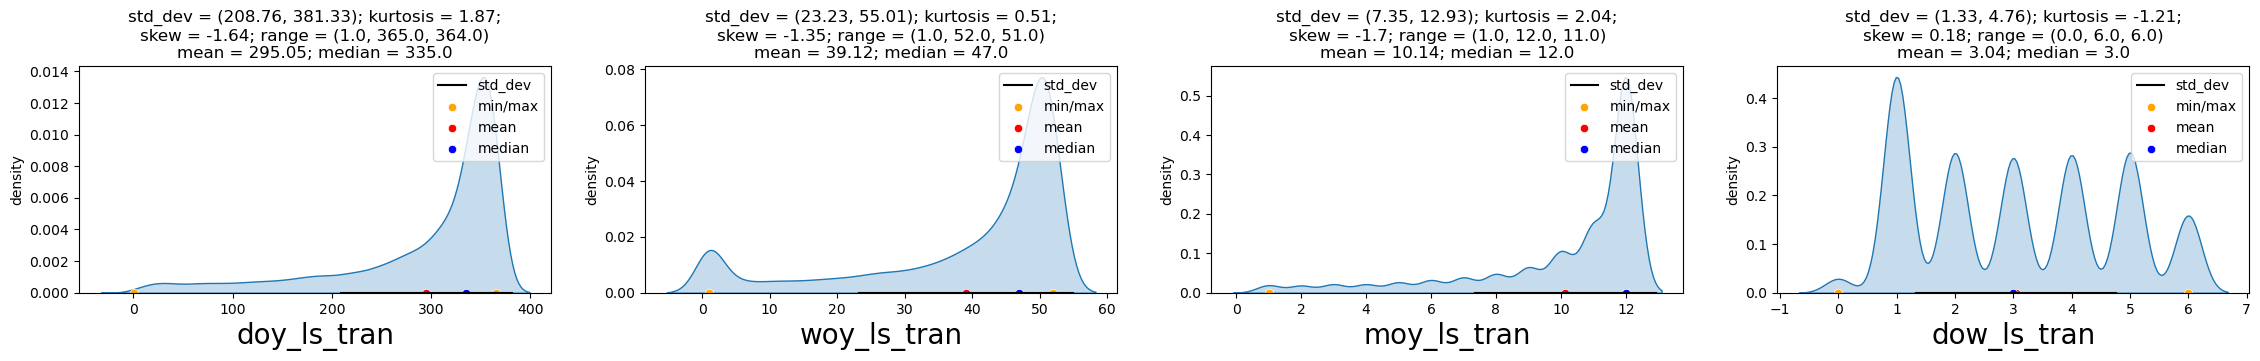

In [28]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others. While Sundays are least favoured for transaction compared to the other days of week.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

### UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

In [29]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [30]:
# seggregating variables into groups
customer_info = ['occupation','gender','customer_nw_category']
account_info = ['city','branch_code']
# churn remains as it is.

In [31]:
# Custom function for easy visualisation of Categorical Variables 
# Using barplot for every groups
def UVA_category(data, var_group):

  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

#### CUSTOMER INFO

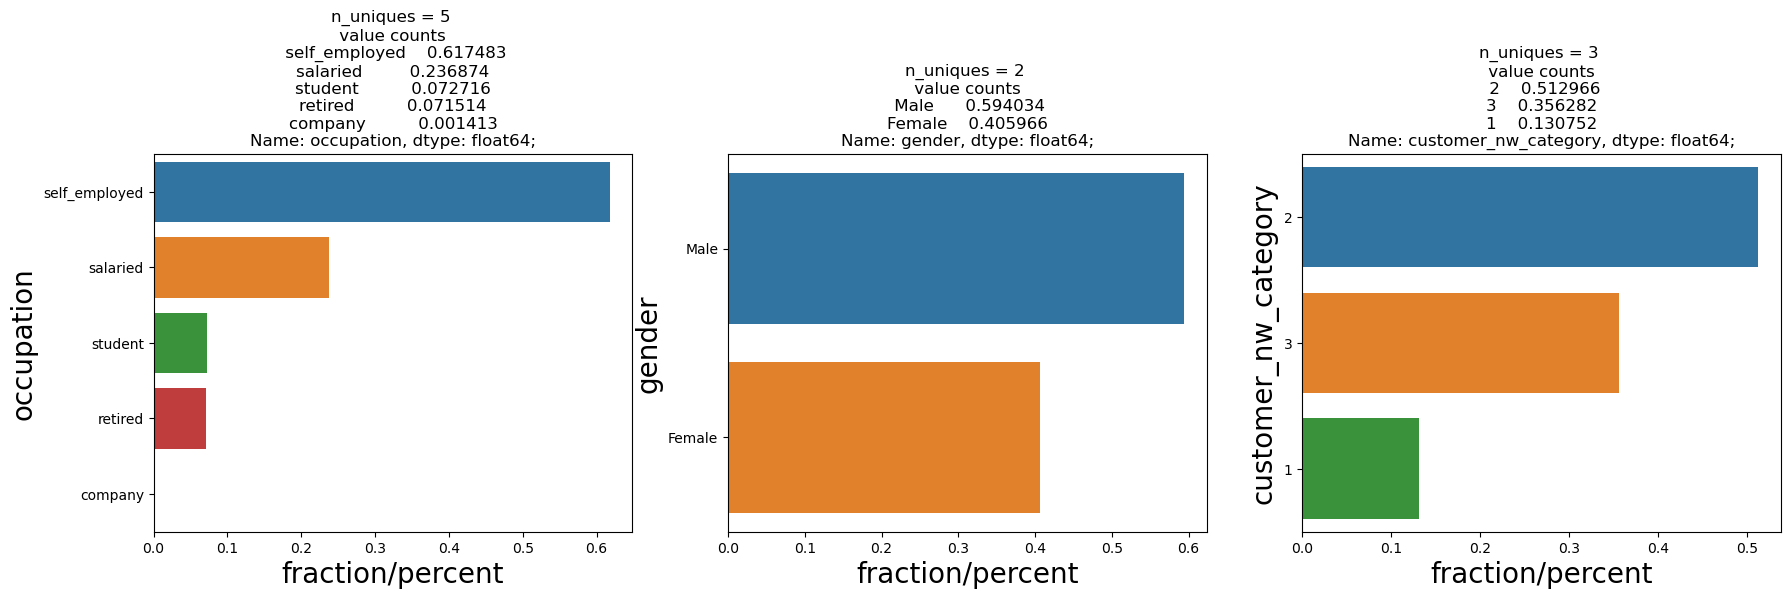

In [32]:
UVA_category(data,customer_info)

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

#### ACCOUNT INFO

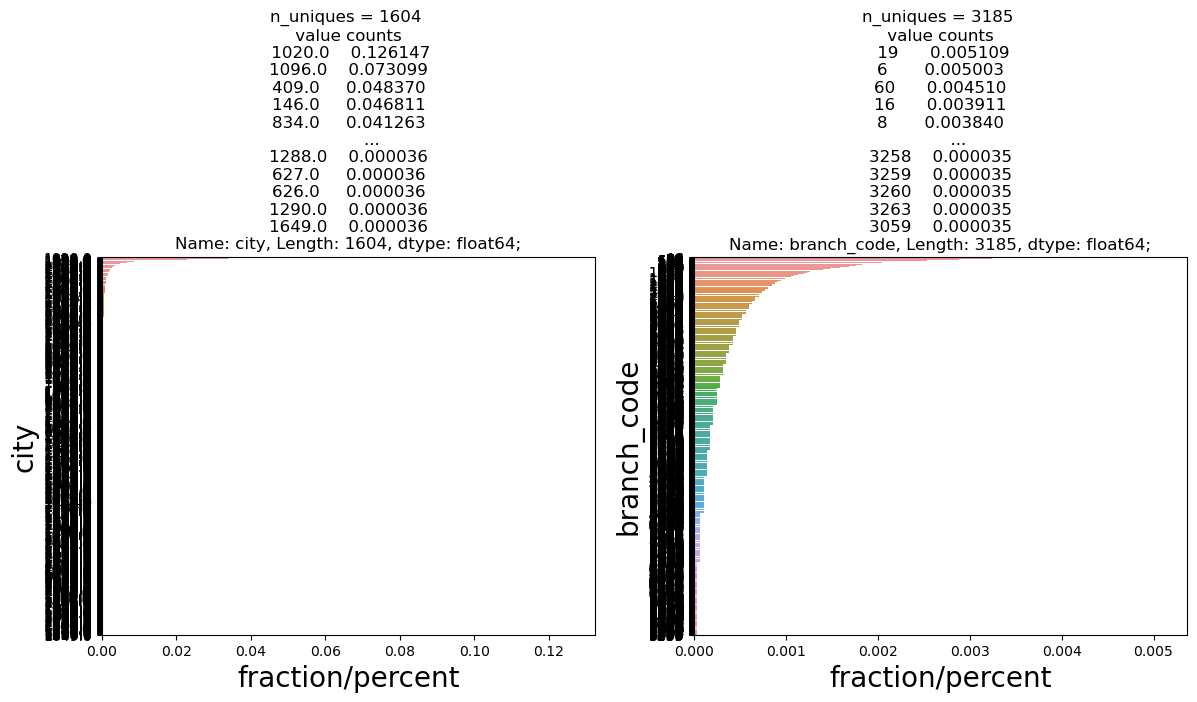

In [33]:
UVA_category(data,account_info)

(0.0, 0.02)

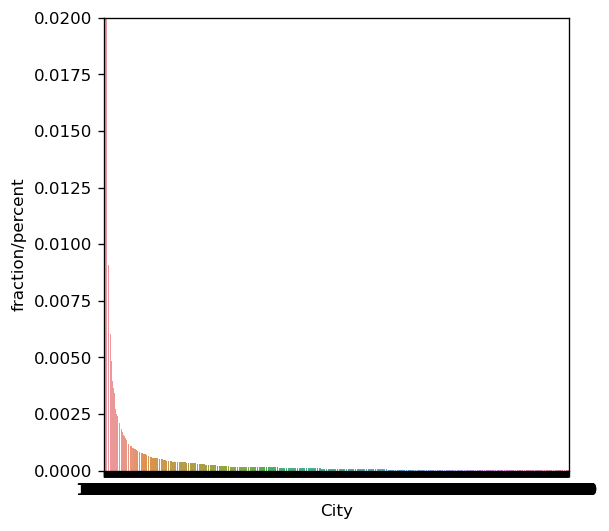

In [34]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

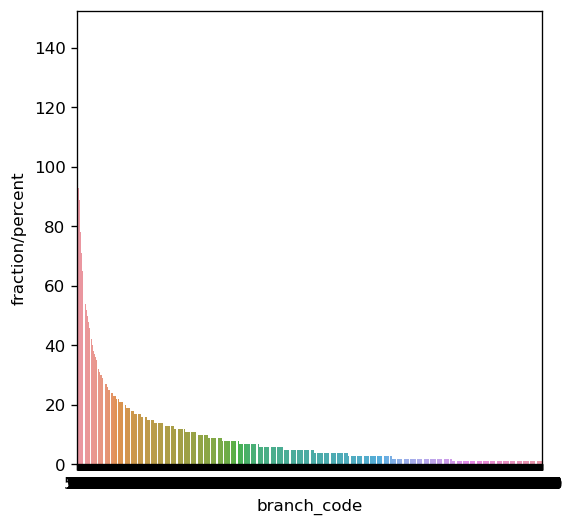

In [35]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

**Summary:**
for both variable "city" and "branch_code", there are too many categories. However this is clear that some branches and cities are more popular with customers and this trend decreases rapidly.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

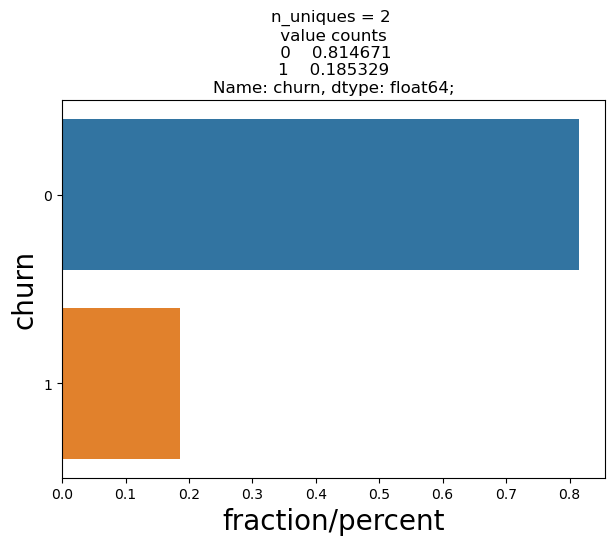

In [36]:
UVA_category(data, ['churn'])

* Number of people who churned are 1/4 times of the people who did not churn in the given data.


### UNIVARIATE MISSING VALUES  

In [37]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
woy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


### UNIVARIATE ANALYSIS : OUTLIERS 

In [38]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
 
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

#### CURRENT MONTH 

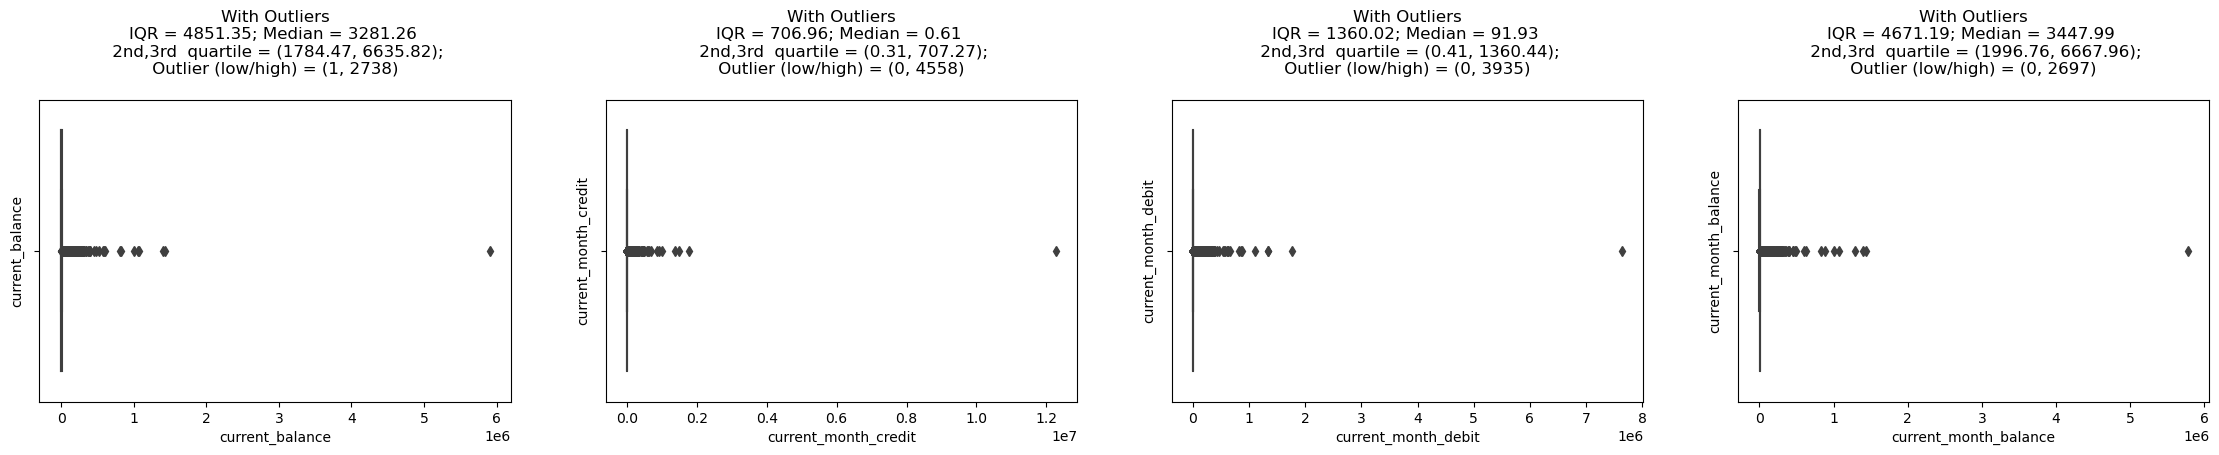

In [39]:
UVA_outlier(data, current_month,)

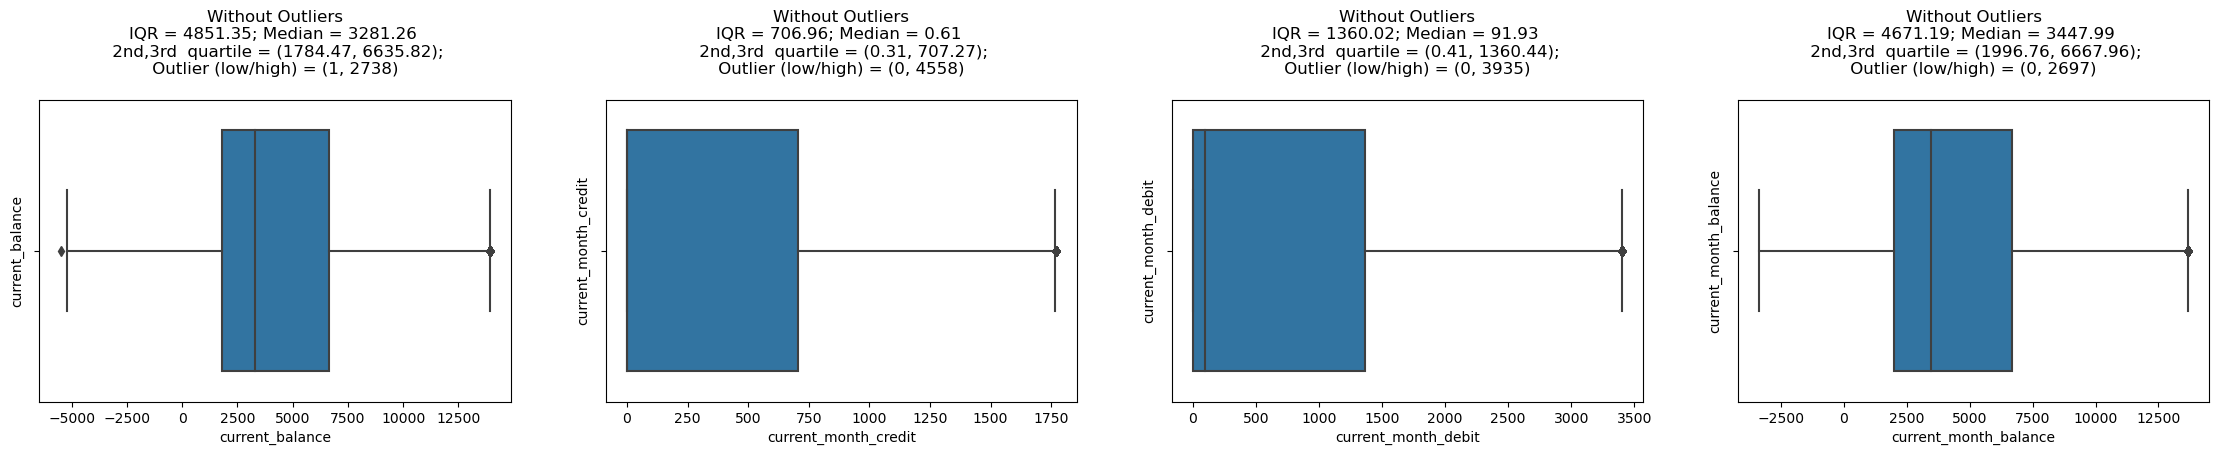

In [40]:
UVA_outlier(data, current_month, include_outlier=False)

#### PREVIOUS MONTH

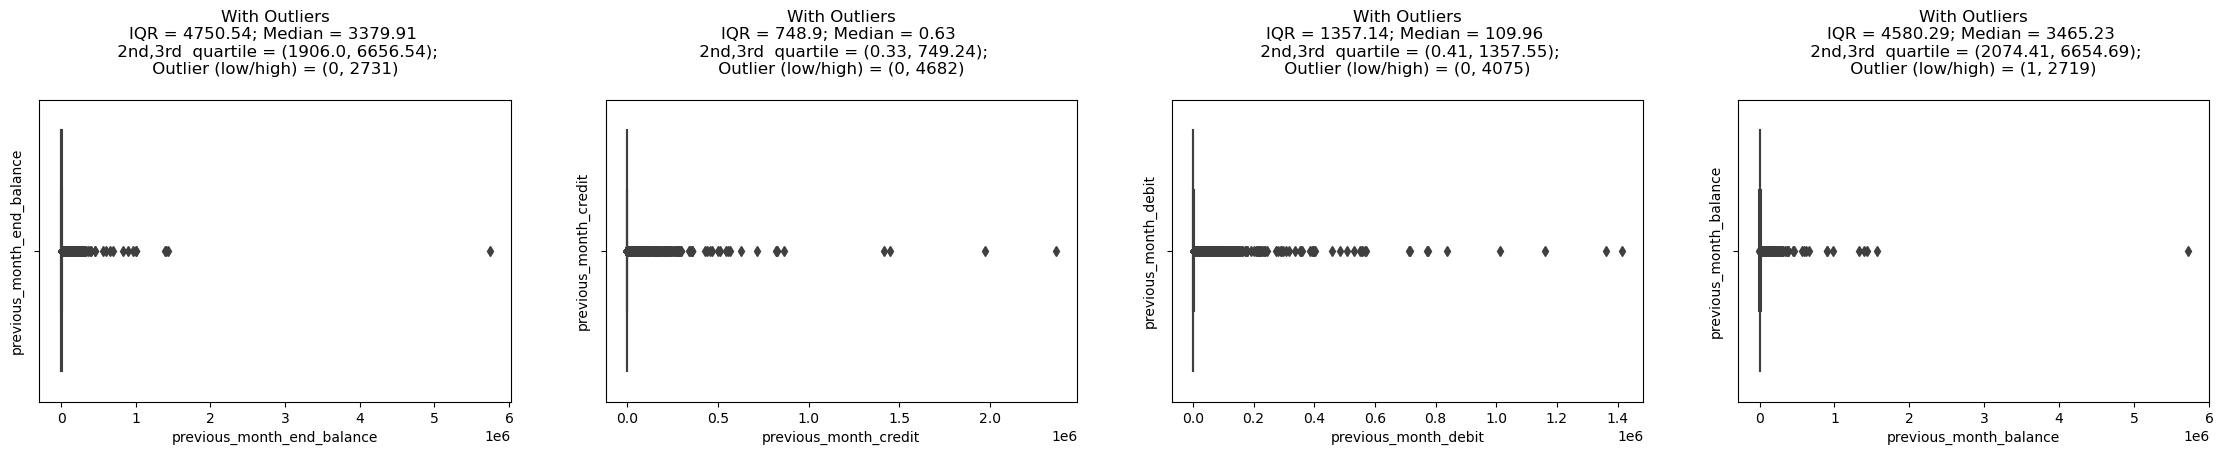

In [41]:
UVA_outlier(data, previous_month)

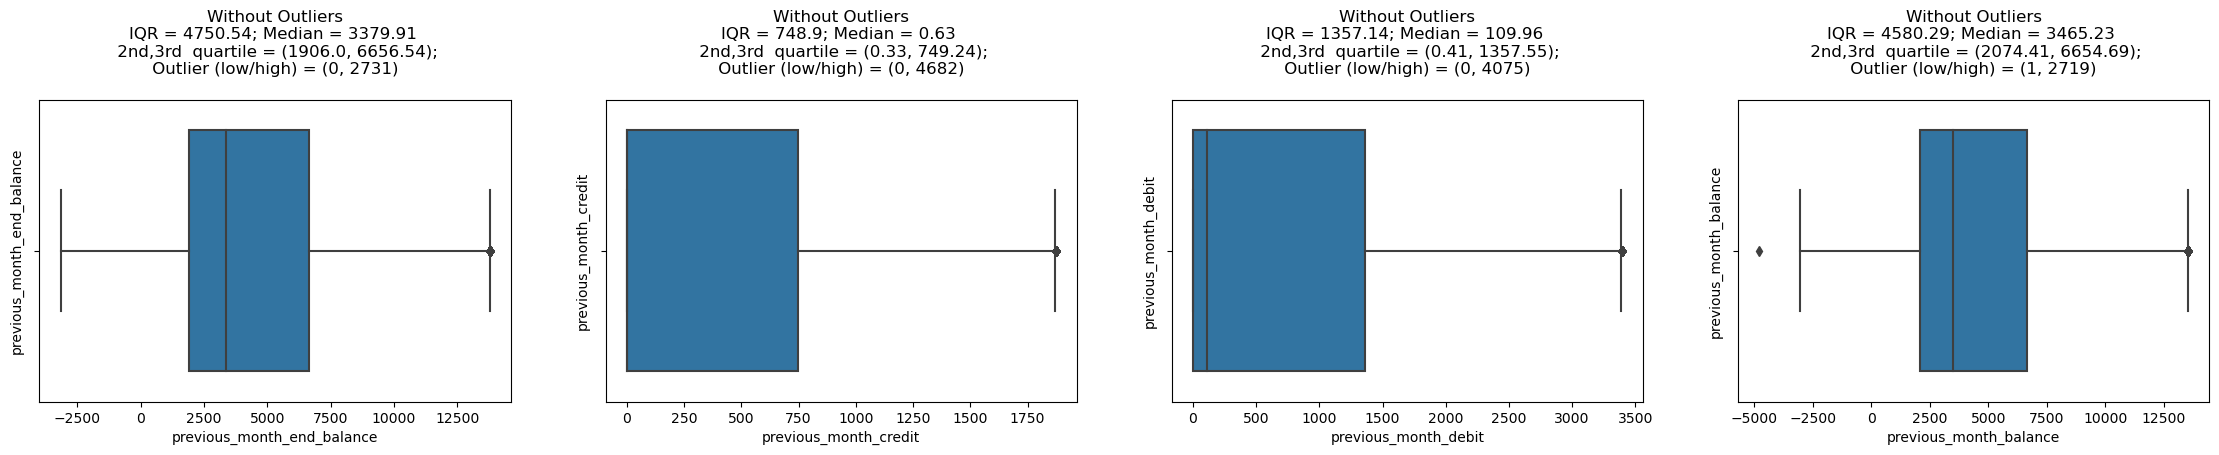

In [42]:
UVA_outlier(data, previous_month, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

#### PREVIOUS QUARTERS

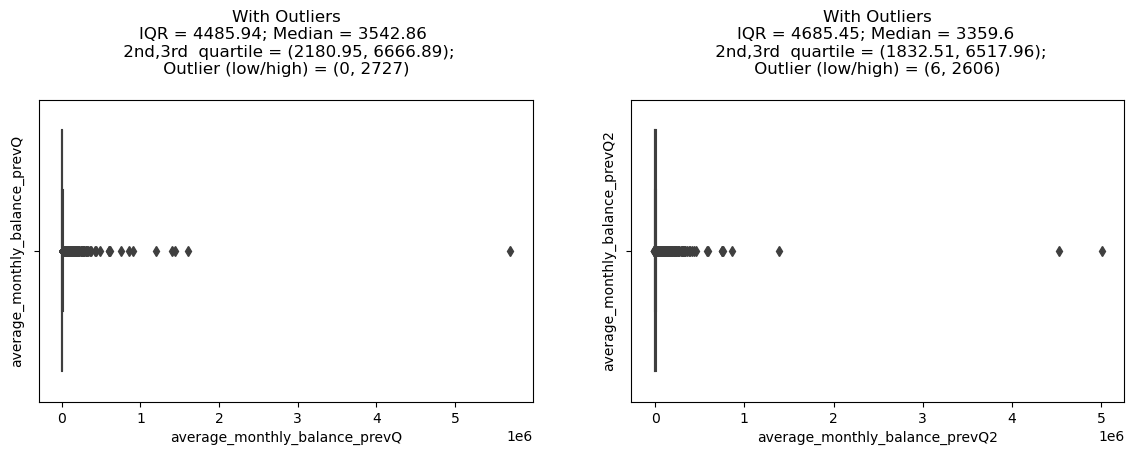

In [43]:
UVA_outlier(data,previous_quarters)

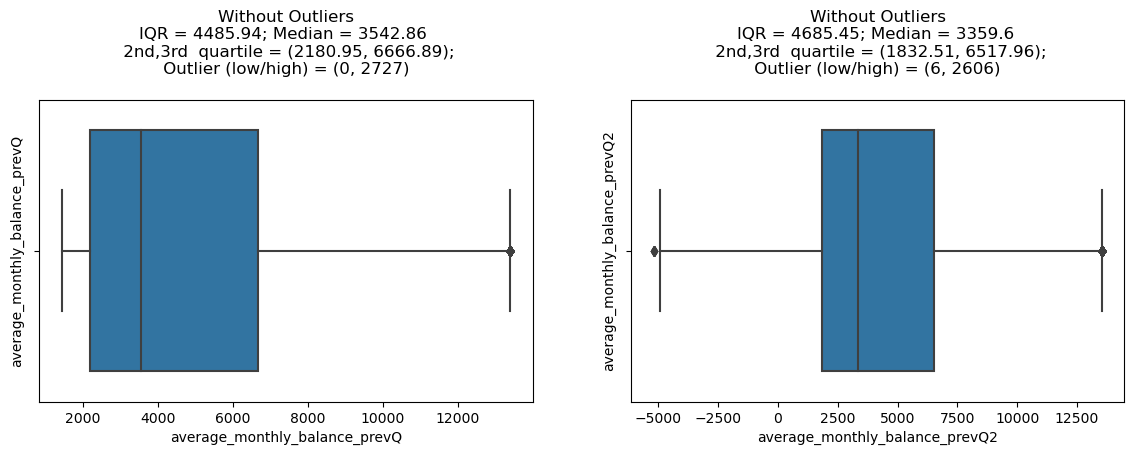

In [44]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

#### Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.


### BIVARIATE ANALYSIS : NUMERICAL-NUMERICAL 

In [45]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

### CORRELATION MATRIX 

In [46]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,0.011344,-0.005374,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.010040,-0.001359,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.000501,0.011970,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.034460,0.077978,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,-0.008980,0.033127,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.000946,0.023485,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,-0.000577,0.020949,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,-0.012720,0.009123,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.008664,0.030267,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.016762,0.066691,-0.006657


### HEATMAP 

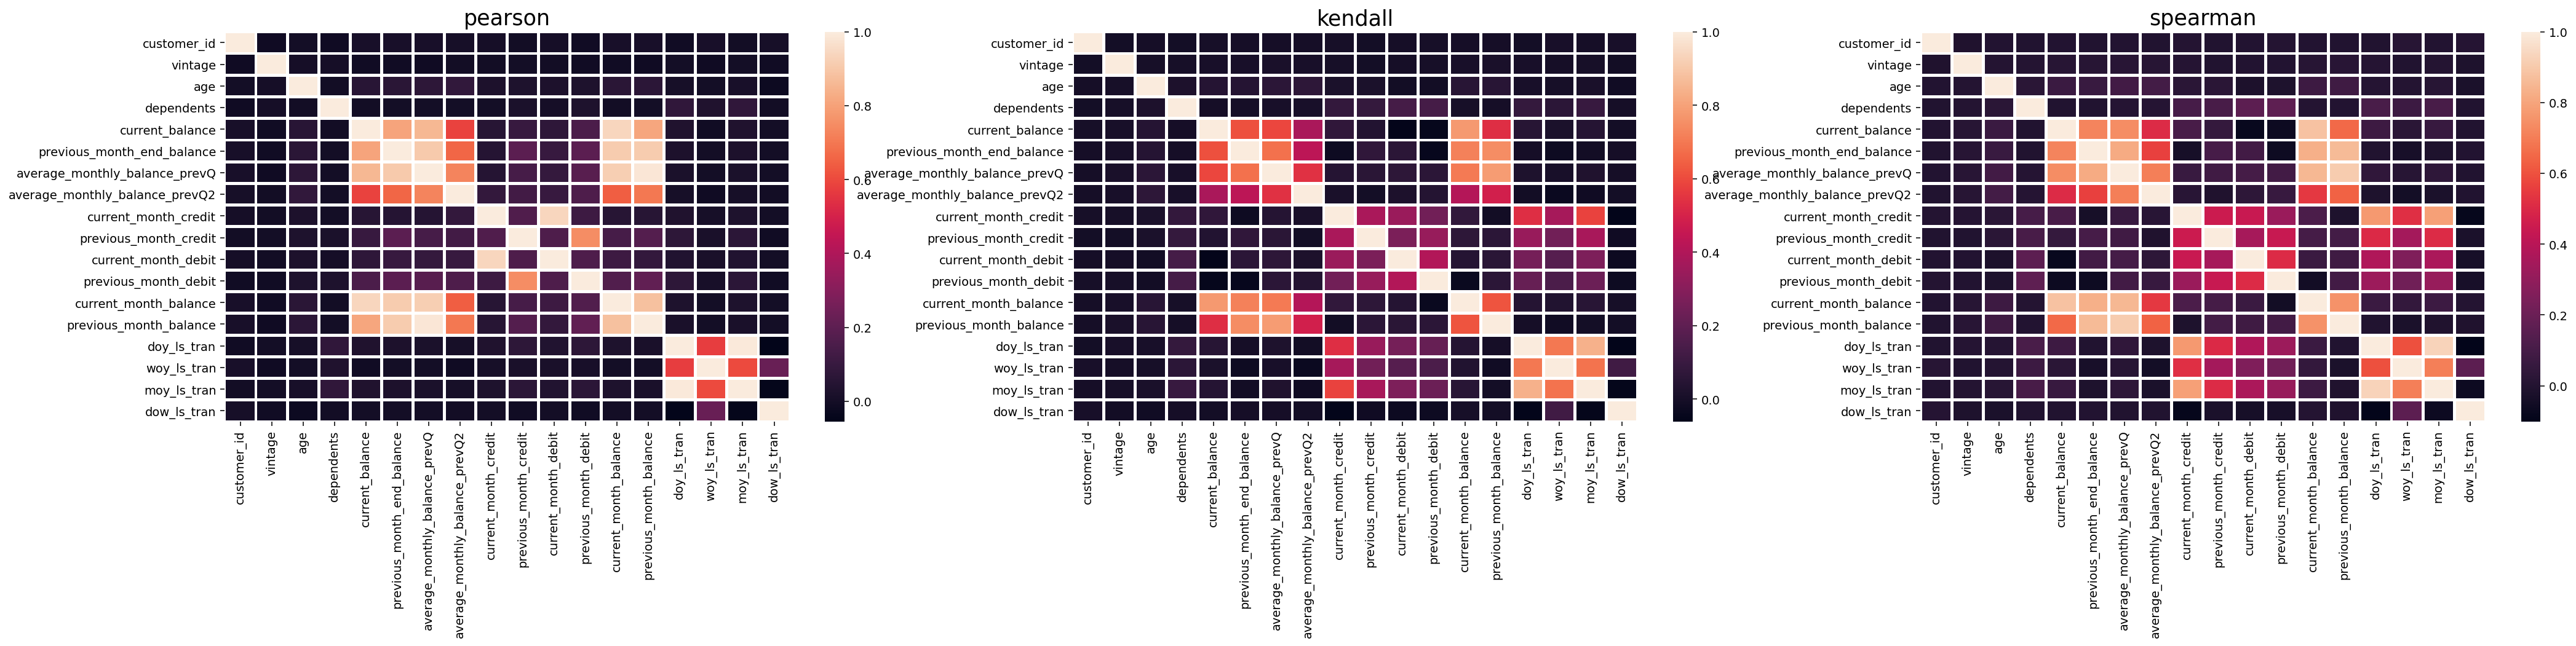

In [47]:
# plotting heatmap using all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [48]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

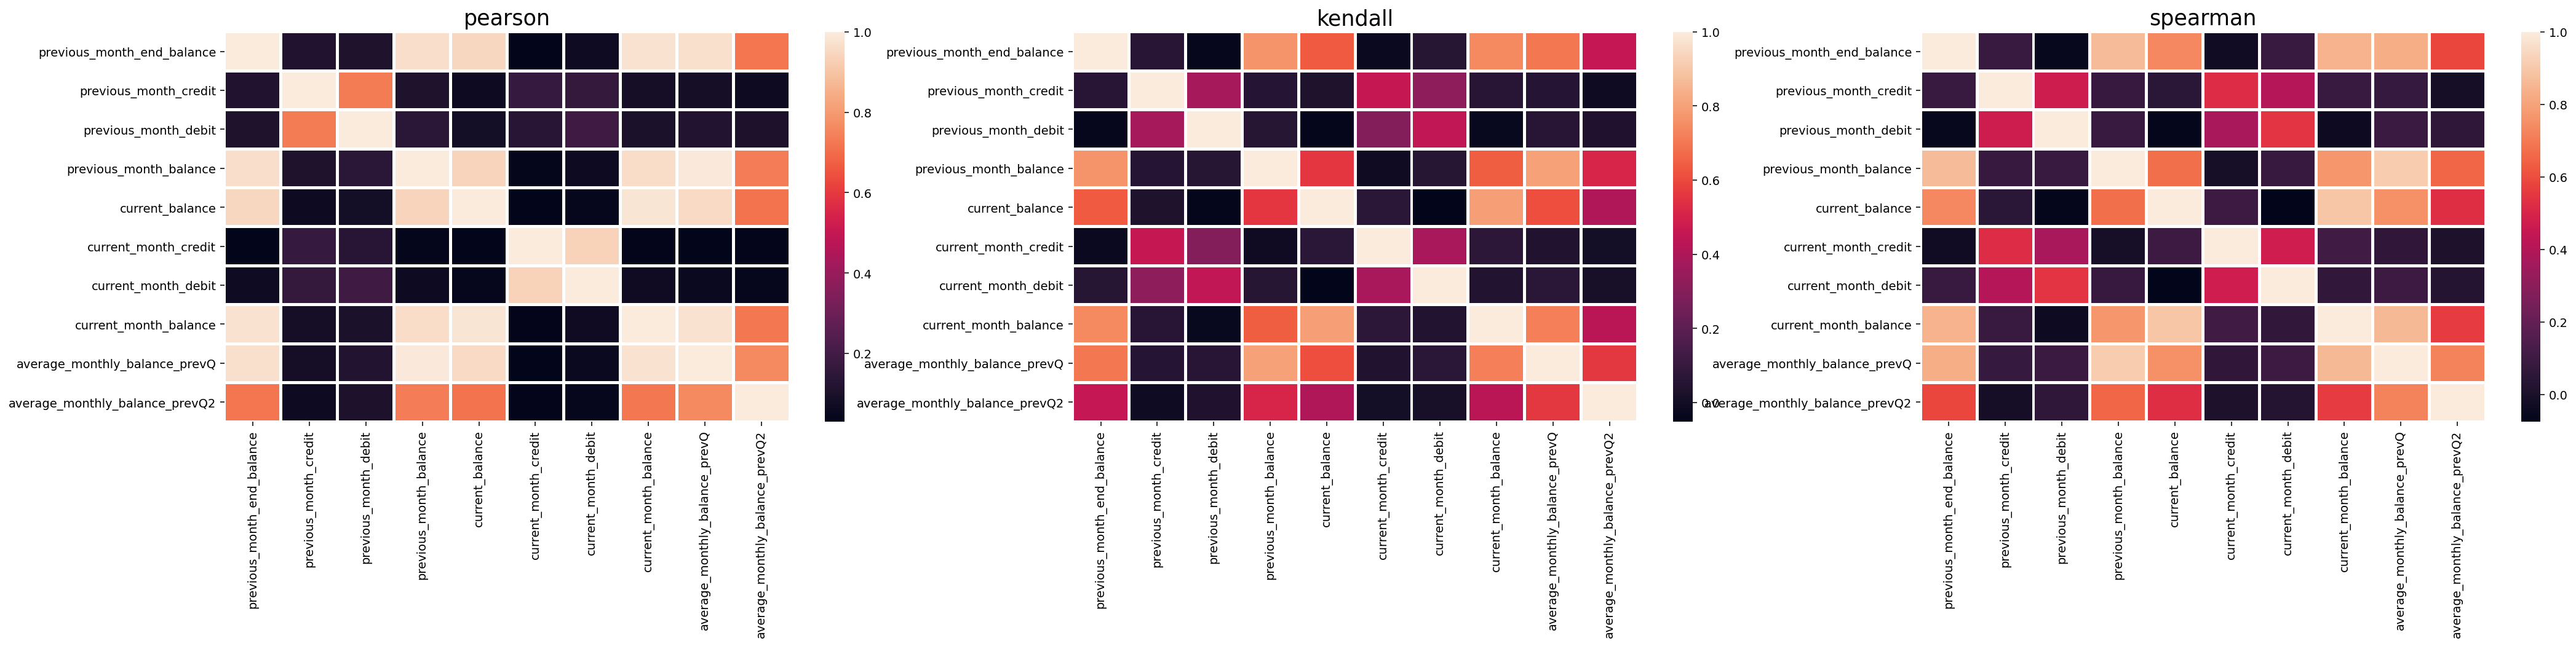

In [49]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



### SCATTER PLOT 

In [50]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

<Figure size 840x560 with 0 Axes>

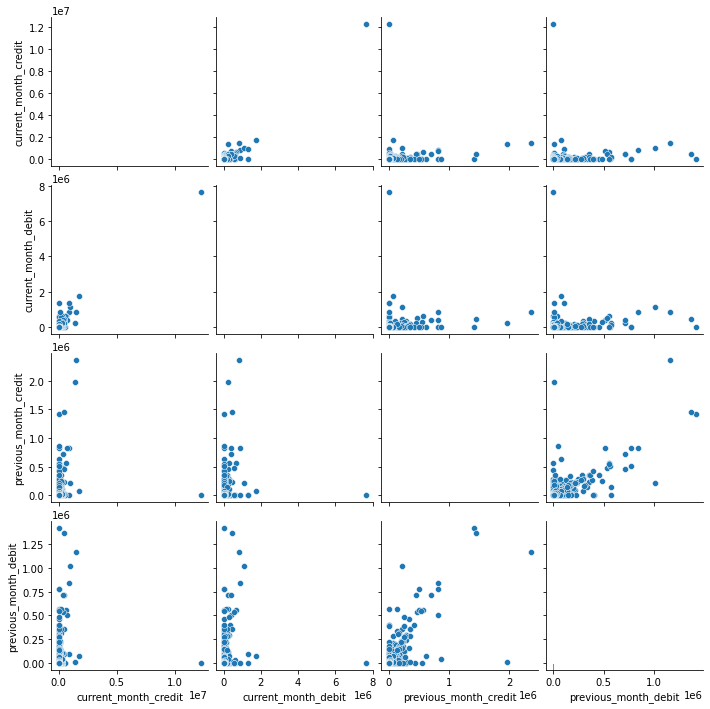

In [51]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

There are outliers present , so its not meaningful

In [52]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

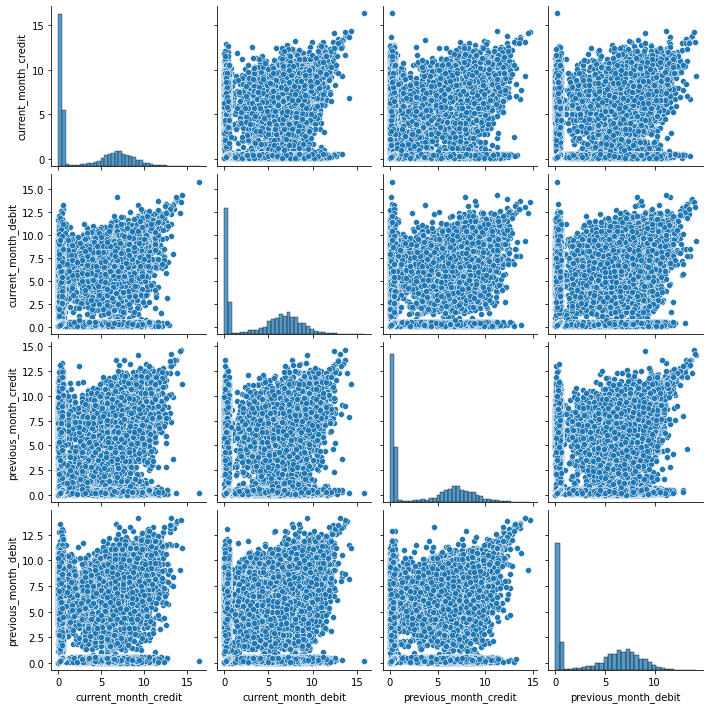

In [53]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 840x560 with 0 Axes>

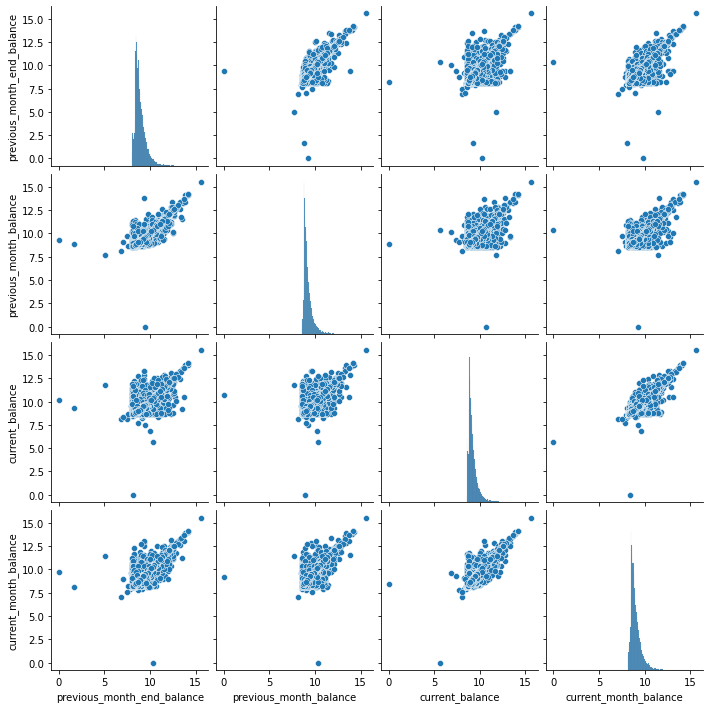

In [54]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

<AxesSubplot:xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

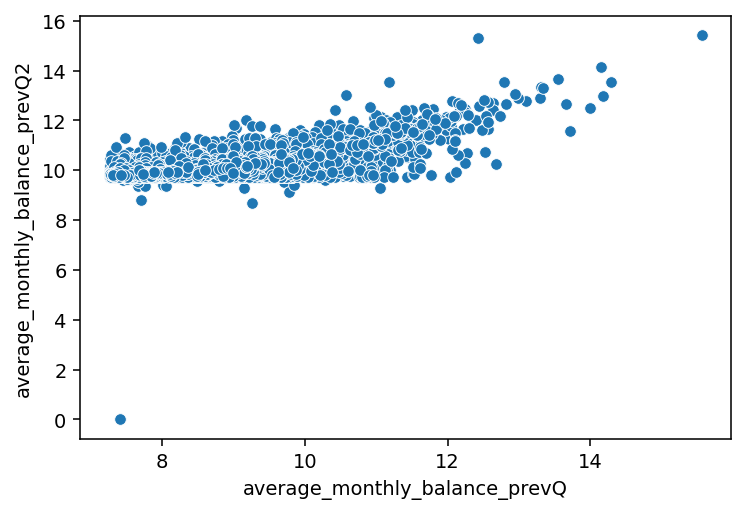

In [55]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(numerical['average_monthly_balance_prevQ'], numerical['average_monthly_balance_prevQ2'])

**Inferences**
1.    This validates the high correlation between the two previous quarters
2.    This high correlation can be used for feature engineering during the later stages.

## MULTIVARIATE ANALYSIS 

### PIVOT TABLE

### Gender, Occupation, Customer Net worth category with Churn

In [56]:
data['gender'] = data['gender'].astype('object')
data['occupation'] = data['occupation'].astype('object')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['churn'] = data['churn'].astype('int')
data['city'] = data['city'].astype('float')
data['branch_code'] = data['branch_code'].astype('float')

* Suitable datatype for Creating Pivot table in Pandas version (categorical datatype is not supported)

In [57]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

* __Highest number of churning customers__ are those __Male Customers__ who lie in __2 net worth category__ and belong to __Self-employed__ profession
* Proportion wise for net worth category 1, Approximately 22% __Male customers__ who belong to the __Self-employed__ profession are churning
* Proportion wise for net worth category 2, 20% __Male customers__ who belong to the __Self-employed__ profession are churning
* For net worth category 3, Approximately 21% __Male customers__ who belong to the __Self-employed__ profession are churning

* In all the cases of Customer net worth category, __Self-employed Male customers__ are more likely to churn

* This would be interesting to dig deeper and find out if the __"Self-employed Male"__ Customers are more churning more

### Gender, Age, Occupation with Churning Status

Let's use one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who are churning.
We will have to convert continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [58]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]        NaN      NaN       7.0           27.0    102.0
       (25, 50]       2.0      0.0     226.0          852.0     38.0
       (50, 100]      1.0     52.0      70.0          605.0      0.0
Male   (0, 25]        0.0      NaN      17.0           74.0    137.0
       (25, 50]       0.0      2.0     563.0         1107.0     47.0
       (50, 100]      0.0    251.0     264.0          698.0      0.0

In [59]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

* We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100
* Highest number of Customers are churning from __Male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__
* Highest Proportion of Customers are churning from __Male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__
* Here also __Self Employed Male customers__ are churning more than any other combination of categories



### Gender,Age,Occupation and Current Balance with Churning Status

Let's dig deeper by using two continuous variables Age and Current Balance and Two Categorical Variable Gender and Occupation and try to find out the insights related to churning customers profile

In [60]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                     NaN     NaN      5.0          22.0    64.0   
       (25, 50]                    1.0     0.0    146.0         522.0    20.0   
       (50, 100]                   1.0    34.0     45.0         353.0     0.0   
Male   (0, 25]                     0.0     NaN     12.0          52.0    95.0   
       (25, 50]                    0.0     0.0    328.0         694.0    30.0   
       (50, 100]                   0.0   156.0    150.0         364.0     NaN   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                    NaN     NaN      1.0           4.0    21.0   
       (25, 50]                   1.0     0.0     51.0         171.0     7.0   
       (50, 100]                  NaN     8.0     14.0         125.0     NaN   
Male   (0, 25]                    NaN     NaN      4.0          12.0    20.0   
       (25, 50]                   0.0     1.0    129.0         208.0    10.0   
       (50, 100]                  0.0    39.0     52.0         143.0     NaN   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                      NaN     NaN      1.0           1.0    17.0  
       (25, 50]                     0.0     NaN     29.0         159.0    11.0  
       (50, 100]                    0.0    10.0     11.0         127.0     NaN  
Male   (0, 25]                      NaN     NaN      1.0          10.0    22.0  
       (25, 50]                     0.0     1.0    106.0         205.0     7.0  
       (50, 100]                    0.0    56.0     62.0         191.0     0.0

In [61]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

* Current balance is divided into 3 quantiles
* It is visible at first look that for __low current balance__ more number of customers are churning
* For the first quantile of current balance, More than __18%__ (overall average churning) of customers are churning and for second and third quantile percentage of churning customers is less than 18%
* In first quantile of current balance, for __self employed profession__ as the age increases for customers, their churning proportion decreases. This means that __Young Self employed Customers__ are more prone to churn 
* There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __Young Male Self employed customers__ are churning more than young female self employed customers

## BOX PLOT

Now in order to comply with our objective of identifying churning customers profile we will use grouped Box plot.

In [62]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')



## Age, Occupation, Churn


We are using one continuous variable Age and one categorical variable Occupation to derive insights related to churning customers profile

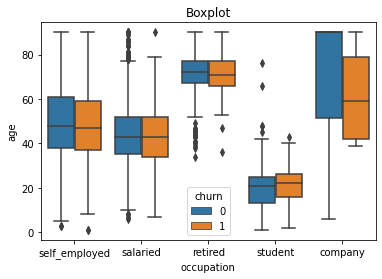

In [63]:
Grouped_Box_Plot(data,'age', 'occupation', 'churn')

We can notice here that 
* For __Self-employed__ profession churning customers are slightly __younger__ than non churning customers
* In the retired occupation for non churning customers, there are many outliers that indicate __young people who retire early are not churning__



### Vintage, Gender, Churn

It is also important to know the significance of vintage on churning profile of customers gender wise
So let't take Vintage and Gender to derive insights for churning customers

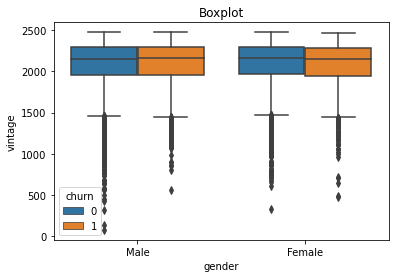

In [64]:
Grouped_Box_Plot(data,'vintage','gender', 'churn')

* There is __no visible difference__ in the vintage feature for genderwise churning and non churning customers



## Pair Plot

#### Churn vs Current & Previous month balances

Now, we will check the relationship of the some transactional variables along with the churning status. Here conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

In [65]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data1.columns

In [66]:
data1['churn'] = data['churn']

We will use the brilliant pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution

Here I have included the following:
* Log of current balance & previous month end balance
* Log of average monthly balance of current and previous month
* Churn is represented by the color here (Orange - Churn, Blue - Not Churn)

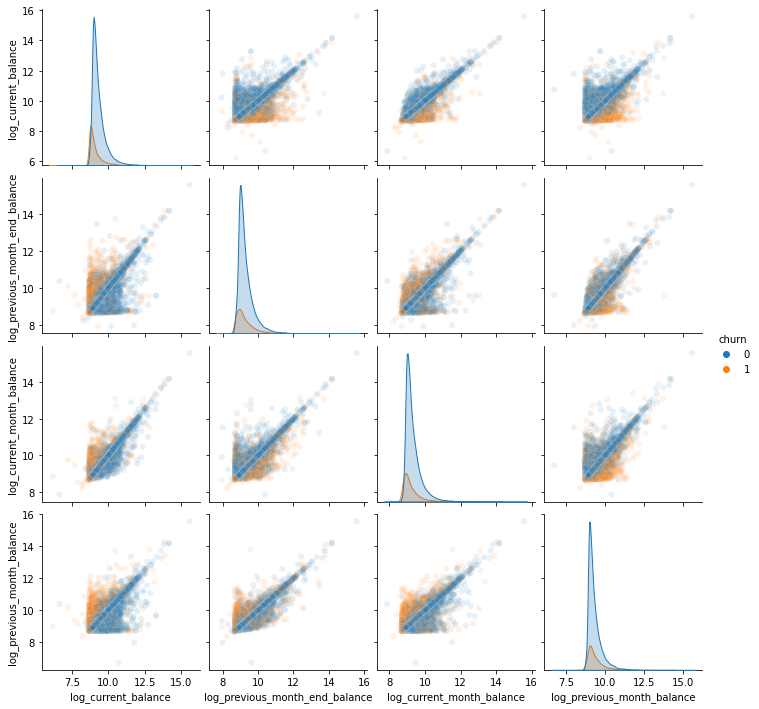

In [67]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

The distribution for these features look similar. We can make the following conclusions from this:
* There is high correlation between the previous and current month balances which is expected
* The distribution for churn and not churn is slightly different for both the cases

### Credit and Debits for current and previous months

Total credit and debit amounts for the current and previous can be clubbed into the same category. Let us again use the pair plot to check distributions and scatter plots.

In [68]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

In [69]:
data1['churn'] = data['churn']

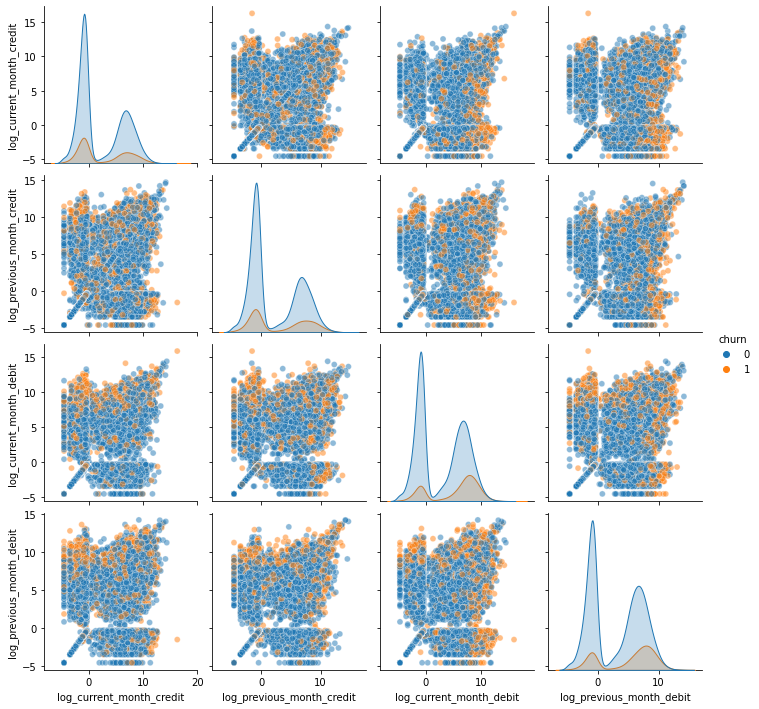

In [70]:
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature

## Encoding

In [71]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,customer_id,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,2101,66,0,187.0,755.0,1458.71,1458.71,1458.71,1449.07,...,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2,2348,35,0,NaN,3214.0,5390.37,8704.66,7799.26,12419.41,...,44.0,11.0,4.0,1,0,0,1,0,1,0
2,4,2194,31,0,146.0,41.0,3913.16,5815.29,4910.17,2815.94,...,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5,2329,90,<NA>,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,...,32.0,8.0,1.0,0,0,0,1,0,1,0
4,6,1579,42,2,1494.0,388.0,927.72,1401.72,1643.31,1871.12,...,44.0,11.0,6.0,1,0,0,1,0,0,1


* Encoding the variables using get dummies pandas function so every variable has numerical value attached to it

## Missing Values with Mode

In [72]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [73]:
fill_mode(data_encoded)

* Filling missing values with the mode of the data

### Segregating variables: Independent and Dependent Variables

In [74]:
data_encoded = data_encoded.drop('customer_id', axis=1)

* Insignification variable drop

In [75]:
#seperating independent and dependent variables
x = data_encoded.drop(['churn'], axis=1)
y = data_encoded['churn']
x.shape, y.shape

((28382, 26), (28382,))

* Creating features and target variable

In [76]:
x

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,2101,66,0,187.0,755.0,1458.71,1458.71,1458.71,1449.07,0.20,...,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2348,35,0,1020.0,3214.0,5390.37,8704.66,7799.26,12419.41,0.56,...,44.0,11.0,4.0,1,0,0,1,0,1,0
2,2194,31,0,146.0,41.0,3913.16,5815.29,4910.17,2815.94,0.61,...,52.0,12.0,1.0,1,0,1,0,0,1,0
3,2329,90,0,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,0.47,...,32.0,8.0,1.0,0,0,0,1,0,1,0
4,1579,42,2,1494.0,388.0,927.72,1401.72,1643.31,1871.12,0.33,...,44.0,11.0,6.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0,1020.0,1207.0,1076.43,1076.43,2282.19,2787.70,0.30,...,43.0,10.0,1.0,0,0,0,0,1,1,0
28378,1537,34,0,1046.0,223.0,3844.10,4069.21,3668.83,3865.55,1.71,...,51.0,12.0,1.0,0,0,0,1,0,1,0
28379,2376,47,0,1096.0,588.0,65511.97,61017.55,53444.81,21925.81,4666.84,...,1.0,12.0,1.0,1,0,1,0,0,1,0
28380,1745,50,3,1219.0,274.0,1625.55,1625.55,1683.20,1857.42,0.20,...,52.0,12.0,1.0,1,0,0,1,0,0,1


In [77]:
y

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int32

In [78]:
data_encoded.columns

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'doy_ls_tran', 'woy_ls_tran',
       'moy_ls_tran', 'dow_ls_tran', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

### Splitting the data into train set and the test set

In [79]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Normalising using *min_max_scaler*


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
cols = train_x.columns
cols

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran',
       'dow_ls_tran', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed', 'occupation_student',
       'customer_nw_category_2', 'customer_nw_category_3'],
      dtype='object')

In [82]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.928007,0.348315,0.000000,0.378034,0.499686,0.002316,0.001973,0.000966,0.003331,3.390372e-04,...,0.980392,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.929255,0.516854,0.000000,0.009102,0.199749,0.000937,0.000563,0.000011,0.003458,4.527154e-04,...,0.941176,1.000000,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.956305,0.808989,0.000000,0.618932,0.232796,0.001390,0.000922,0.000114,0.003467,4.197765e-07,...,1.000000,1.000000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.642530,0.258427,0.000000,0.906553,0.210625,0.001194,0.000870,0.000132,0.003326,1.354118e-08,...,0.784314,0.818182,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.897628,0.494382,0.019231,0.665049,0.019034,0.010039,0.011464,0.011463,0.013612,3.685034e-02,...,0.980392,1.000000,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,woy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.933000,0.516854,0.019231,0.747573,0.021334,0.001343,0.000952,0.000220,0.004242,5.128721e-05,...,1.000000,1.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.841448,0.337079,0.000000,0.665049,0.018406,0.001781,0.001474,0.000652,0.004185,1.083294e-07,...,0.843137,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.917603,0.629213,0.000000,0.374393,0.047689,0.001189,0.000873,0.000020,0.003524,3.723824e-07,...,0.666667,0.636364,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.712859,0.269663,0.000000,0.618932,0.230914,0.000911,0.000578,0.000902,0.007583,3.249883e-07,...,0.803922,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.927591,0.853933,0.000000,0.248180,0.068605,0.000986,0.000654,0.000241,0.003854,1.489530e-07,...,0.058824,0.000000,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,1.0


* Scaling the data so model doesn't have bias for high valued features

## MODEL BUILDING 

In [84]:
#importing Logistic Regression and metric accuracy score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
# Creating instance of Logistic Regresssion
logreg = LR()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

# Calculating accuracy-score
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )

# Predicting over the Test Set and accuracy-score
test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )



Training accuracy_score 0.8238748473174857
Test accuracy_score     0.8279312288613303


* Logistic regression works pretty well and able to provide accuracy more than 80% for both training and test set

## MODEL BUILDING ON PREDICTION ODD RATIO 

In [85]:
data['churn'].value_counts()/len(data)

0    0.814671
1    0.185329
Name: churn, dtype: float64

In [86]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [87]:
#splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, train_size = 0.80, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22705, 26), (5677, 26), (22705,), (5677,))

In [88]:
classifier = LR(class_weight = 'balanced')

In [89]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)              # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [90]:
predicted_values

array([1, 0, 1, ..., 1, 1, 0])

In [91]:
predicted_probabilities , predicted_probabilities.shape

(array([[0.43759781, 0.56240219],
        [0.55214932, 0.44785068],
        [0.22737884, 0.77262116],
        ...,
        [0.47223915, 0.52776085],
        [0.4461391 , 0.5538609 ],
        [0.59758427, 0.40241573]]),
 (5677, 2))

In [92]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[3472, 1153],
       [ 406,  646]], dtype=int64)

Got more accuracy output than using the previous (from min max scaler) .

In [93]:
#Accuracy
classifier.score(x_test, y_test)

0.7253831248899066

In [94]:
#calculating the precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.35908838243468594

In [95]:
#calculating recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.6140684410646388

In [96]:
# manually calculating the f1 score
f1 = 2/((1/Precision)+(1/Recall))
f1

0.4531743247983163

In [97]:
#calculating the f1-score 
# H.M. of precision and recall
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.4531743247983164

In [98]:
# calculating precision, recall, f1-score and support at once.[support is number of instances for class 1 and class 0]
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)

In [99]:
precision

array([0.89530686, 0.35908838])

In [100]:
recall

array([0.7507027 , 0.61406844])

In [101]:
f1

array([0.81665295, 0.45317432])

In [102]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      4625
           1       0.36      0.61      0.45      1052

    accuracy                           0.73      5677
   macro avg       0.63      0.68      0.63      5677
weighted avg       0.80      0.73      0.75      5677



## PRECISION RECALL CURVE


In [103]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((5672,), (5672,), (5671,))

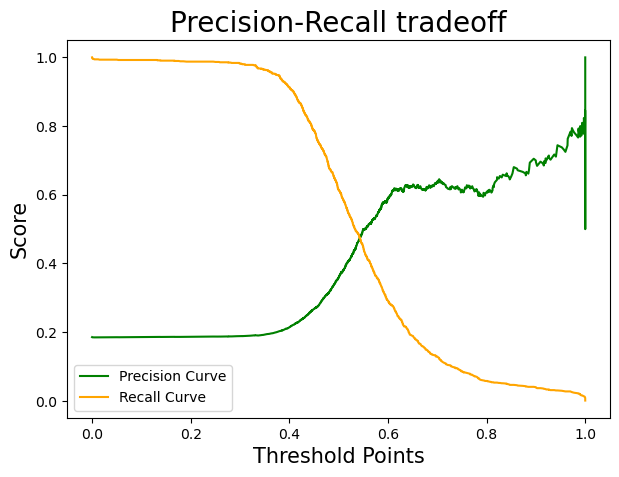

In [104]:
plt.figure(figsize = (7,5), dpi = 100)
#skip 1 point from precision and recall
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

## AUC-ROC


In [105]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

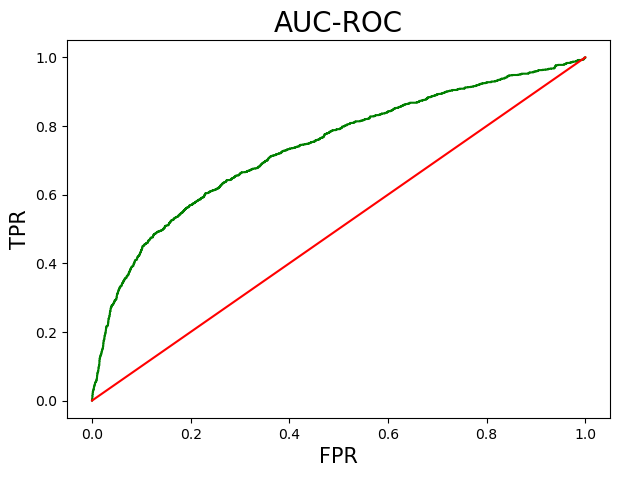

0.7370315486589251

In [106]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

## Coefficient Plot 

In [107]:
# arranging the data
c = classifier.coef_.reshape(-1)
X = x.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : X
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
5,-5.294381,current_balance
14,-1.117491,previous_month_balance
15,-0.761183,doy_ls_tran
10,-0.257617,previous_month_credit
8,-0.170138,average_monthly_balance_prevQ2


Text(0.5, 1.0, 'Coefficient plot')

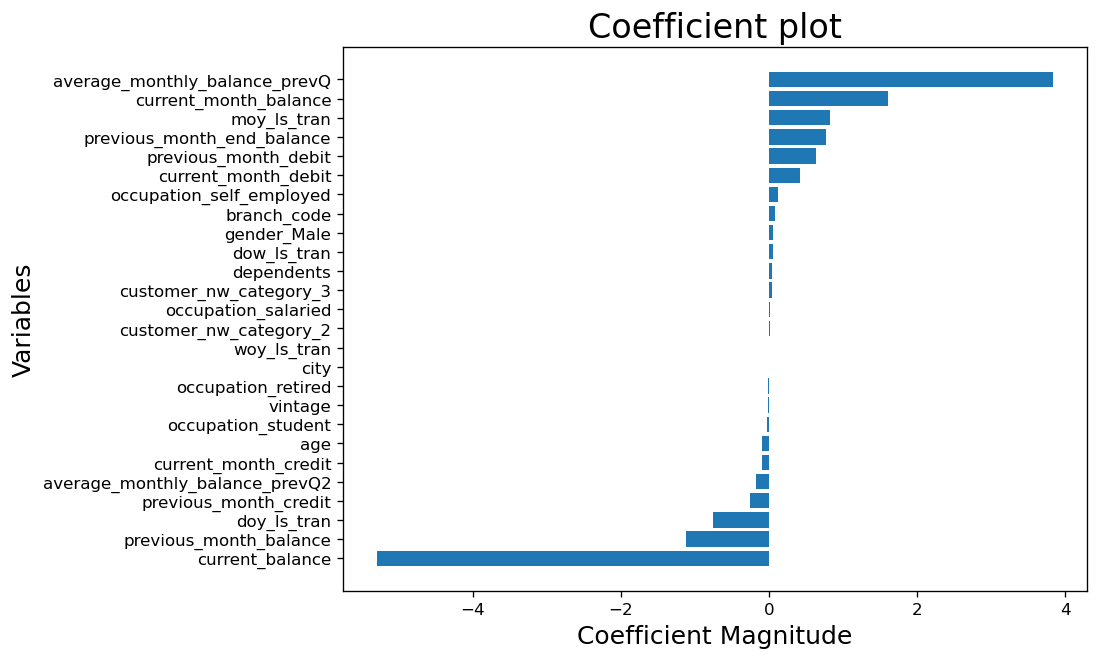

In [108]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)

## IMPLEMENTING DECISION TREE 

In [109]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
classifier = DTC()

In [110]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [111]:
predicted_values[:30]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0])

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18497
           1       1.00      1.00      1.00      4208

    accuracy                           1.00     22705
   macro avg       1.00      1.00      1.00     22705
weighted avg       1.00      1.00      1.00     22705



In [113]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file = 'tree_viz',
                max_depth=None, feature_names = x.columns ,
                label = None, impurity = False )

In [114]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [115]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.
i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))   
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    accuracy_list.append(score)
    print('accuracy_score',score)     
    i+=1 
    


1 of kfold 5
accuracy_score 0.7842170160295932

2 of kfold 5
accuracy_score 0.7983089660031707

3 of kfold 5
accuracy_score 0.775722339675828

4 of kfold 5
accuracy_score 0.7935165609584214

5 of kfold 5
accuracy_score 0.7903453136011276


In [116]:
mean_accuracy = sum(accuracy_list)/ len(accuracy_list)
print(mean_accuracy)

0.7884220392536282


## Hyperparamter Tuning

In [117]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

### MAX DEPTH 

In [118]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):

  model.fit(x1,y1)

  predict = model.predict(x1)
  f1 = f1_score(y1, predict)

  predict = model.predict(x2)
  f2 = f1_score(y2, predict)

  return f1, f2

In [119]:
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize = (5,5), dpi = 120)
  plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
  plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("f1 score")
  plt.show()

In [120]:
maxdepth = [i for i in range(1,50)]
train = []
test = []

for i in maxdepth:  
  model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

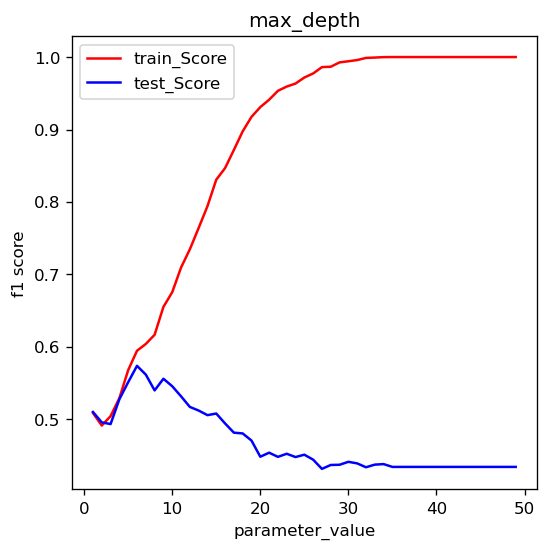

In [121]:
effect( train, test, range(1,50) , 'max_depth')

## MIN SAMPLE SPLIT 

In [122]:
min_samples = [i for i in range(2,5000, 25)]
train = []
test = []

for i in min_samples:  
  model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

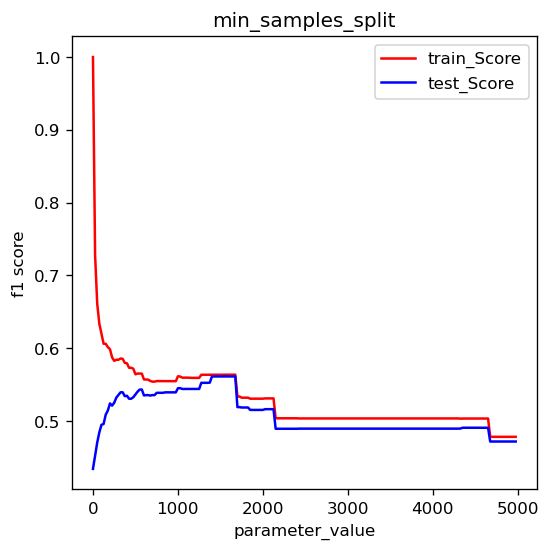

In [123]:
effect( train, test, range(2,5000, 25) , 'min_samples_split')

### MAX LEAF NODES

In [124]:
maxleafnodes = [i for i in range(2,200,10)]
train = []
test = []

for i in maxleafnodes:  
  model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

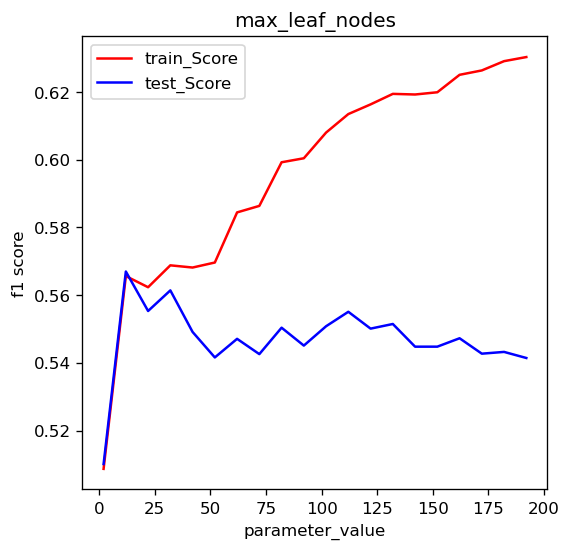

In [125]:
effect( train, test, range(2,200,10) , 'max_leaf_nodes')

### MIN SAMPLE LEAF 

In [126]:
minsamplesleaf = [i for i in range(2,4000,25)]
train = []
test = []

for i in minsamplesleaf:  
  model = DTC(class_weight = 'balanced', min_samples_leaf = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

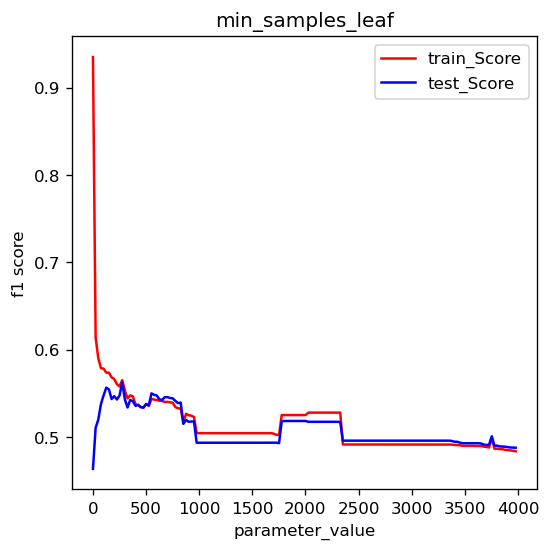

In [127]:
effect( train, test, range(2,4000,25) , 'min_samples_leaf')

In [128]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [129]:
param_dist = {"max_depth": [1, 50],
              "max_features": randint(1, 9),
              "min_samples_split": randint(2,5000),
              "max_leaf_nodes": randint(2,100),
              "min_samples_leaf": randint(2, 4000),
              "criterion": ["gini", "entropy"]}

In [130]:
# Instantiate a Decision Tree classifier: tree
tree = DTC()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 50],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022631E3D3A0>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022631ECC670>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022631F0EEB0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022631EEE3D0>})

In [131]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 7, 'max_leaf_nodes': 96, 'min_samples_leaf': 2532, 'min_samples_split': 885}
Best score is 0.8419774201080656


## BAGGING MODEL AND RANDOM FOREST

In [132]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(train_x,train_y)

BaggingClassifier()

In [133]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator = LR(),
                n_estimators = 150,
                n_jobs = -1,
                random_state = 42)
classifier.fit(train_x, train_y)
predicted_values = classifier.predict(train_x)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(train_y, predicted_values))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     17322
           1       0.75      0.08      0.15      3964

    accuracy                           0.82     21286
   macro avg       0.79      0.54      0.53     21286
weighted avg       0.81      0.82      0.76     21286



In [135]:
predicted_values = classifier.predict(test_x)
print(classification_report(test_y, predicted_values))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5800
           1       0.77      0.08      0.15      1296

    accuracy                           0.83      7096
   macro avg       0.80      0.54      0.53      7096
weighted avg       0.82      0.83      0.77      7096



In [136]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
predicted_values = classifier.predict(x_train)
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18497
           1       1.00      1.00      1.00      4208

    accuracy                           1.00     22705
   macro avg       1.00      1.00      1.00     22705
weighted avg       1.00      1.00      1.00     22705



In [138]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4625
           1       0.74      0.44      0.55      1052

    accuracy                           0.87      5677
   macro avg       0.81      0.70      0.74      5677
weighted avg       0.86      0.87      0.85      5677



In [139]:
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [140]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):

  model.fit(x1,y1)

  predict = model.predict(x1)
  f1 = f1_score(y1, predict)

  predict = model.predict(x2)
  f2 = f1_score(y2, predict)

  return f1, f2

In [141]:
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize = (7,4), dpi = 120)
  plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
  plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("f1 score")
  plt.show()

In [ ]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:  
  model = RFC(class_weight = 'balanced_subsample',
              n_estimators = i,
              n_jobs = -1,
              max_depth = 7,
              random_state = 101)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

In [ ]:
effect( train, test, range(1,600,10) , 'n_estimators')

In [ ]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []

for i in maxsamples:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_samples = i)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

In [ ]:
effect( train, test, maxsamples , 'bootstrap sample fraction')

In [ ]:
maxfeatures = range(1,x.shape[1])
train = []
test = []

for i in maxfeatures:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_features = i)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

In [ ]:
effect( train, test, maxfeatures , 'number of max features for individual tree')

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 600, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 2)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
print(param_grid)

In [ ]:
rf_Model = RFC()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(x_train, y_train)


In [ ]:
rf_RandomGrid.best_params_

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(x_test,y_test):.3f}')

In [ ]:
import joblib 
joblib.dump(ds, "Churn_Prediction_Model.pkl") 
model = joblib.load('Churn_Prediction_Model.pkl' ) 
model.predict(x_test)